In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r'C:\Users\faisa\Documents\Pakistan Top 250 YouTube Channels.csv')
df

,Top #,Twitter
0,1,"ARY Digital,Entertainment,19.2M"
1,2,"HAR PAL GEO,Entertainment,14.4M"
2,3,"TRT Ertugrul by PTV,Entertainment,12.3M"
3,4,"HUM TV,Entertainment,12.2M"
4,5,"Coke Studio,Music,9.82M"
...,...,...
245,246,"Masala Tv Recipes,Howto & Style,734K"
246,247,"WWF - Pakistan,Nonprofits & Activism,731K"
247,248,"AapNewsPK,News & Politics,731K"
248,249,"Naeem aw Rameez,Entertainment,729K"


In [2]:
df.head(10)

,Top #,Twitter
0,1,"ARY Digital,Entertainment,19.2M"
1,2,"HAR PAL GEO,Entertainment,14.4M"
2,3,"TRT Ertugrul by PTV,Entertainment,12.3M"
3,4,"HUM TV,Entertainment,12.2M"
4,5,"Coke Studio,Music,9.82M"
5,6,"Geo News,News & Politics,8.7M"
6,7,"AJ Official,Education,7.22M"
7,8,"ARY News,News & Politics,6.78M"
8,9,"Islamic Teacher Official,Education,6.43M"
9,10,"SAMAA TV,News & Politics,6.02M"


In [3]:
df.columns

Index(['Top #', 'Twitter '], dtype='object')

In [4]:
df.rename({'Twitter ' :"Twitter"},axis=1,inplace=True)


In [5]:
df.columns

Index(['Top #', 'Twitter'], dtype='object')

In [6]:
df[["Channel Name","Category","Subscriber"]]=df['Twitter'].str.split(',',expand=True)

In [7]:
df

,Top #,Twitter,Channel Name,Category,Subscriber
0,1,"ARY Digital,Entertainment,19.2M",ARY Digital,Entertainment,19.2M
1,2,"HAR PAL GEO,Entertainment,14.4M",HAR PAL GEO,Entertainment,14.4M
2,3,"TRT Ertugrul by PTV,Entertainment,12.3M",TRT Ertugrul by PTV,Entertainment,12.3M
3,4,"HUM TV,Entertainment,12.2M",HUM TV,Entertainment,12.2M
4,5,"Coke Studio,Music,9.82M",Coke Studio,Music,9.82M
...,...,...,...,...,...
245,246,"Masala Tv Recipes,Howto & Style,734K",Masala Tv Recipes,Howto & Style,734K
246,247,"WWF - Pakistan,Nonprofits & Activism,731K",WWF - Pakistan,Nonprofits & Activism,731K
247,248,"AapNewsPK,News & Politics,731K",AapNewsPK,News & Politics,731K
248,249,"Naeem aw Rameez,Entertainment,729K",Naeem aw Rameez,Entertainment,729K


In [8]:
df.drop(["Top #","Twitter"],axis=1,inplace=True)

In [9]:
df

,Channel Name,Category,Subscriber
0,ARY Digital,Entertainment,19.2M
1,HAR PAL GEO,Entertainment,14.4M
2,TRT Ertugrul by PTV,Entertainment,12.3M
3,HUM TV,Entertainment,12.2M
4,Coke Studio,Music,9.82M
...,...,...,...
245,Masala Tv Recipes,Howto & Style,734K
246,WWF - Pakistan,Nonprofits & Activism,731K
247,AapNewsPK,News & Politics,731K
248,Naeem aw Rameez,Entertainment,729K


In [10]:
df.isnull().sum()

Channel Name    0
Category        0
Subscriber      0
dtype: int64

In [11]:
df['Channel Name'].duplicated().sum()

0

In [12]:
def value_to_no(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
df['Subscriber']=df['Subscriber'].apply(value_to_no)
    
    

In [13]:
df.head(10)

,Channel Name,Category,Subscriber
0,ARY Digital,Entertainment,19200000.0
1,HAR PAL GEO,Entertainment,14400000.0
2,TRT Ertugrul by PTV,Entertainment,12300000.0
3,HUM TV,Entertainment,12200000.0
4,Coke Studio,Music,9820000.0
5,Geo News,News & Politics,8700000.0
6,AJ Official,Education,7220000.0
7,ARY News,News & Politics,6780000.0
8,Islamic Teacher Official,Education,6430000.0
9,SAMAA TV,News & Politics,6020000.0


<AxesSubplot:title={'center':'Youtube Channel Has Subscriber more than 6M '}, xlabel='Channel Name', ylabel='Subscriber'>

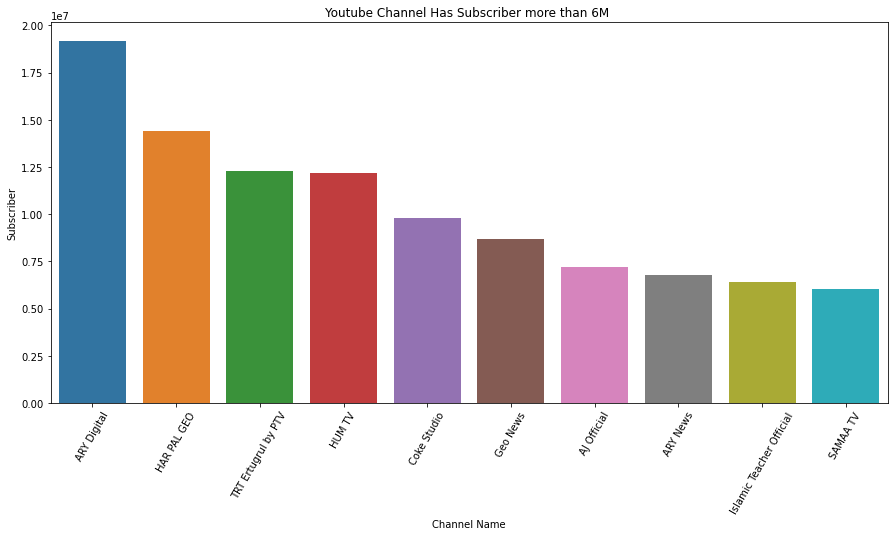

In [14]:
plt.figure(figsize=(15,7))
plt.title('Youtube Channel Has Subscriber more than 6M ')
plt.xticks(rotation=60)
sns.barplot(x='Channel Name',y='Subscriber',data=df.query('Subscriber > 6000000'))



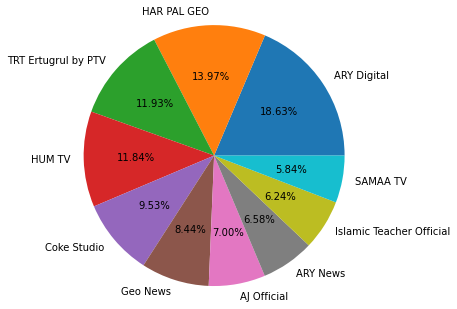

In [15]:
plt.axis('equal')
plt.pie('Subscriber',labels='Channel Name',data=df.query('Subscriber>6000000'),radius=1.5,autopct='%1.2f%%')
plt.show()

<AxesSubplot:title={'center':'Top 10 Pakistan Education Youtube Channel'}>

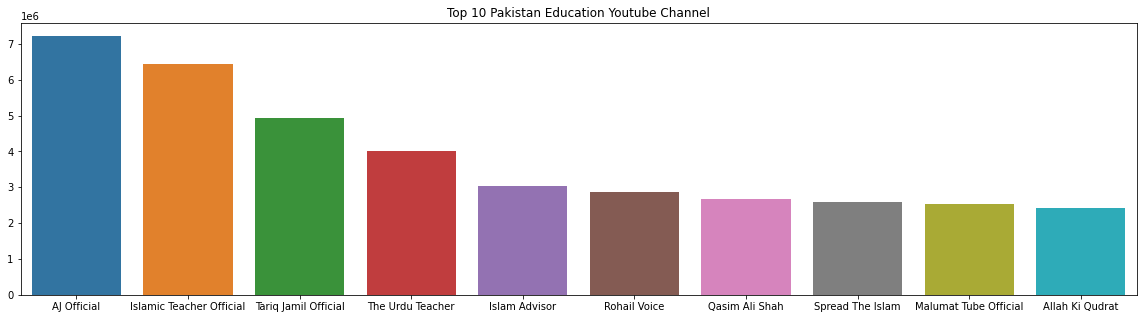

In [16]:
plt.figure(figsize=(20,5))
plt.title('Top 10 Pakistan Education Youtube Channel')
channels=df.query('Category=="Education"')
Subscriber=list(channels['Subscriber'].head(10))
Names=list(channels['Channel Name'].head(10))
sns.barplot(x=Names,y=Subscriber)

<AxesSubplot:title={'center':'Top 10 Pakistan Youtube Entertainment Channel'}>

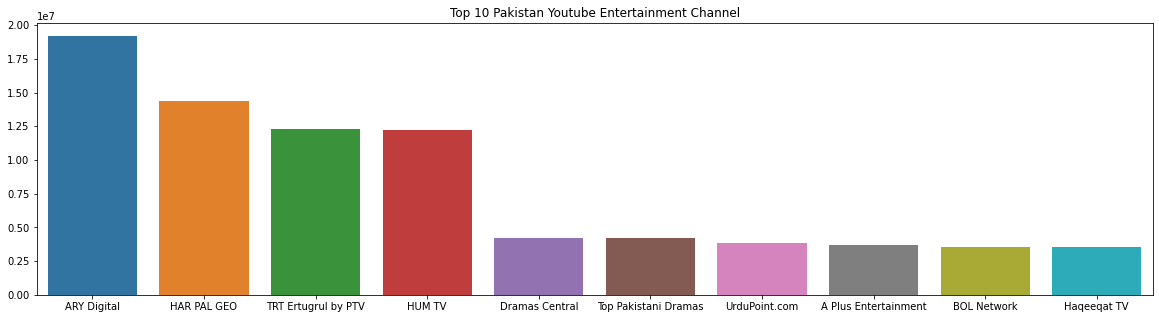

In [17]:
plt.figure(figsize=(20,5))
plt.title('Top 10 Pakistan Youtube Entertainment Channel')
channels=df.query('Category=="Entertainment"')
Subscriber=list(channels['Subscriber'].head(10))
Names=list(channels['Channel Name'].head(10))
sns.barplot(x=Names,y=Subscriber)

<AxesSubplot:title={'center':'Top 10 Pakistan Youtube News Channel'}>

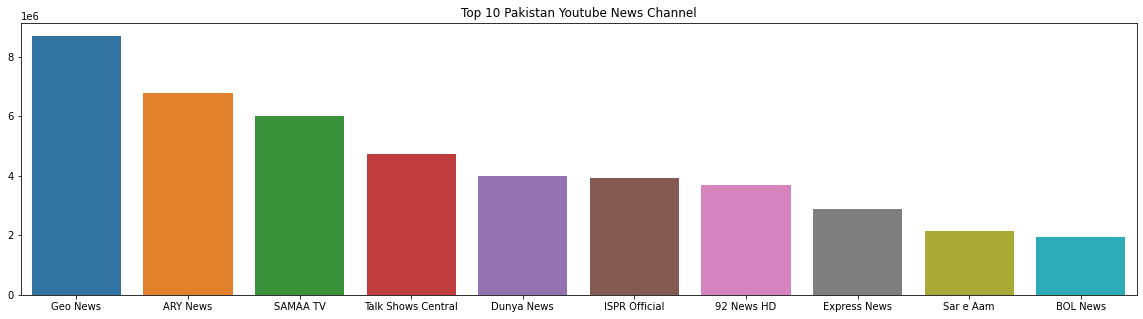

In [18]:
plt.figure(figsize=(20,5))
plt.title('Top 10 Pakistan Youtube News Channel')
channels=df.query('Category=="News & Politics"')
Subscriber=list(channels['Subscriber'].head(10))
Names=list(channels['Channel Name'].head(10))
sns.barplot(x=Names,y=Subscriber)

<AxesSubplot:title={'center':'Top 10 Pakistan Youtube News Channel'}>

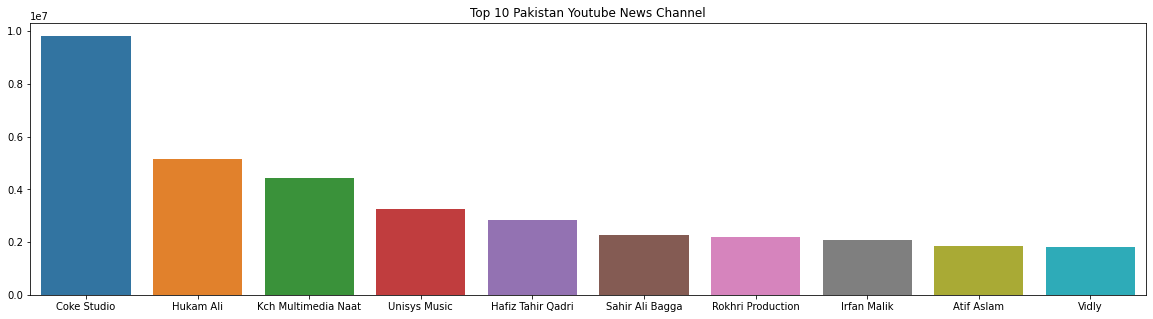

In [19]:
plt.figure(figsize=(20,5))
plt.title('Top 10 Pakistan Youtube News Channel')
channels=df.query('Category=="Music"')
Subscriber=list(channels['Subscriber'].head(10))
Names=list(channels['Channel Name'].head(10))
sns.barplot(x=Names,y=Subscriber)

<AxesSubplot:title={'center':'Top Pakistani Comedy youtube Channel'}>

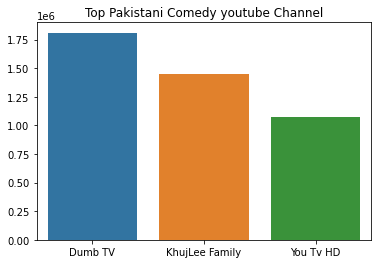

In [20]:

plt.title('Top Pakistani Comedy youtube Channel')
channels=df.query('Category=="Comedy"')
Subscriber=list(channels['Subscriber'])
Names=list(channels['Channel Name'])
sns.barplot(x=Names,y=Subscriber)

In [25]:
Top_10_channel = df.groupby("Channel Name")["Subscriber"].agg(["sum"]).reset_index().sort_values(by="sum",ascending=False).head(10)
Top_10_channel

,Channel Name,sum
4,ARY Digital,19200000.0
73,HAR PAL GEO,14400000.0
201,TRT Ertugrul by PTV,12300000.0
76,HUM TV,12200000.0
38,Coke Studio,9820000.0
72,Geo News,8700000.0
2,AJ Official,7220000.0
6,ARY News,6780000.0
104,Islamic Teacher Official,6430000.0
182,SAMAA TV,6020000.0


<AxesSubplot:title={'center':'Top 10 Pakistan Youtube Channel'}, xlabel='Channel Name', ylabel='sum'>

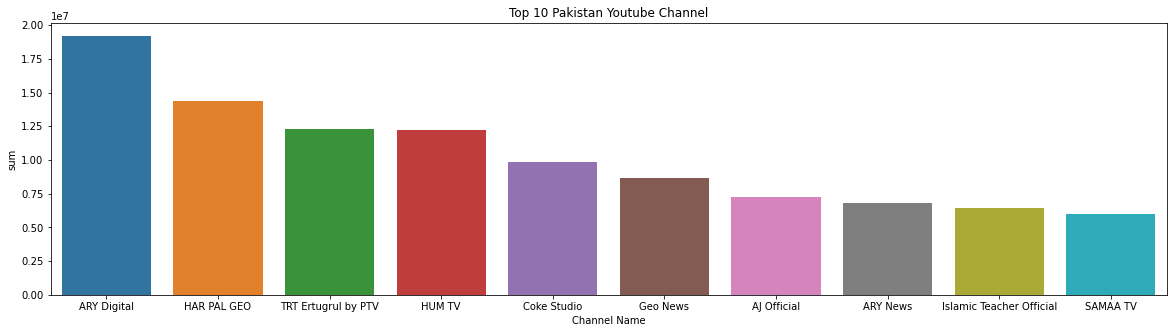

In [32]:
plt.figure(figsize=(20,5))
plt.title('Top 10 Pakistan Youtube Channel')
sns.barplot(x="Channel Name",y="sum",data=Top_10_channel)